In [ ]:
!pip3 install igraph

In [ ]:
os.chdir('/content/')

In [ ]:
!git clone https://github.com/digitalcytometry/cytotrace2

fatal: destination path 'cytotrace2' already exists and is not an empty directory.


In [ ]:
%cd /content/cytotrace2/cytotrace2_python

/content/cytotrace2/cytotrace2_python


In [ ]:
!sudo apt-get install -y libgsl-dev libhdf5-dev
!pip install pyyaml

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgsl-dev is already the newest version (2.7.1+dfsg-3).
libhdf5-dev is already the newest version (1.10.7+repack-4ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


In [ ]:
with open("install_deps.py", "w") as f:
    f.write('''
import yaml
import subprocess
from pkg_resources import working_set

with open("environment_py.yml") as f:
    env_data = yaml.safe_load(f)

pip_dependencies = []
for dep in env_data["dependencies"]:
    if isinstance(dep, dict) and "pip" in dep:
        pip_dependencies.extend(dep["pip"])

base_packages = []
for pkg in pip_dependencies:
    pkg_name = pkg.split("[")[0].split("==")[0].split(">")[0].split("<")[0].split("~")[0].strip().lower()
    base_packages.append(pkg_name)

installed = {pkg.key.lower() for pkg in working_set}
missing = [orig_pkg for orig_pkg, base_pkg in zip(pip_dependencies, base_packages)
          if base_pkg not in installed]


if missing:
    print("Installing missing packages:\\n" + "\\n".join(missing))
    subprocess.run(["pip", "install"] + missing, check=True)
else:
    print("All dependencies already satisfied")
''')


!python install_deps.py
!pip install --no-deps .

try:
    import cytotrace2
    print(f"\\033[1;32mSuccess! CytoTRACE 2 version: {cytotrace2.__version__}\\033[0m")
except Exception as e:
    print(f"\\033[1;31mInstallation failed: {str(e)}\\033[0m")

!rm install_deps.py

/content/cytotrace2/cytotrace2_python/install_deps.py:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
All dependencies already satisfied
Processing /content/cytotrace2/cytotrace2_python
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for cytotrace2_py: filename=cytotrace2_py-1.1.0-py3-none-any.whl size=145164911 sha256=d9b921f817c995a1782d2215239fce153a038ca3297a397a820c3f4d76975f13
  Stored in directory: /tmp/pip-ephem-wheel-cache-b1gkosuc/wheels/20/60/63/bc6dd0555c57cee14ff0d1aec7dc0b8896358eaa6f0f3fb458
Successfully built cytotrace2_py
  Attempting uninstall: cytotrace2_py
    Found existing installation: cytotrace2_py 1.1.0
    Uninstalling cytotrace2_py-1.1.0:
      Successfully uninstalled cytotrace2_py-1.1.0


\033Installation failed: module 'cytotrace2' has no attribute '__version__'\033


In [ ]:
from cytotrace2_py.cytotrace2_py import *

In [ ]:
print(adata_count.X)

  (180, 0)	1.0
  (461, 0)	1.0
  (762, 0)	1.0
  (887, 0)	1.0
  (1718, 0)	1.0
  (2287, 0)	1.0
  (2520, 0)	1.0
  (50, 1)	1.0
  (75, 1)	1.0
  (124, 1)	2.0
  (137, 1)	1.0
  (252, 1)	1.0
  (280, 1)	1.0
  (379, 1)	1.0
  (505, 1)	1.0
  (570, 1)	1.0
  (636, 1)	1.0
  (660, 1)	1.0
  (664, 1)	1.0
  (676, 1)	1.0
  (678, 1)	1.0
  (707, 1)	1.0
  (709, 1)	1.0
  (722, 1)	1.0
  (759, 1)	1.0
  :	:
  (2546, 27578)	1.0
  (2626, 27578)	1.0
  (2737, 27578)	1.0
  (2445, 27605)	2.0
  (2561, 27605)	1.0
  (2629, 27605)	1.0
  (2638, 27605)	1.0
  (2658, 27605)	1.0
  (2692, 27605)	1.0
  (2700, 27605)	1.0
  (2704, 27605)	1.0
  (2899, 27605)	1.0
  (2910, 27605)	1.0
  (2833, 27619)	1.0
  (2536, 27623)	2.0
  (2684, 27623)	1.0
  (2833, 27630)	1.0
  (2546, 27638)	1.0
  (2824, 27638)	1.0
  (2832, 27638)	1.0
  (2660, 27646)	1.0
  (2682, 27646)	1.0
  (2863, 27653)	1.0
  (2451, 27671)	1.0
  (2701, 27685)	1.0


In [ ]:
import pandas as pd

genes = adata_count.var_names
cells = adata_count.obs_names


expression_data = adata_count.X.toarray()

expr_df = pd.DataFrame(expression_data.T, index=genes, columns=cells)
expr_df
expr_df.to_csv("scRNA_seq_gene_expression.txt", sep='\t', header=True, index=True)

cytotrace2: Input parameters
    Input file: scRNA_seq_gene_expression.txt
    Species: human
    Parallelization enabled: True
    Batch size: 20000
    Smoothing batch size: 1000
    Seed: 14
    Output directory: cytotrace2_results
    Plotting enabled: True
    Verbose mode enabled: True
    User-provided limit for number of cores to use: None
       ...96 cores detected. CytoTRACE 2 will run using up to 48/96 cores.
cytotrace2: Loading dataset
cytotrace2: Dataset characteristics
    Number of input genes:  27705
    Number of input cells:  2927
cytotrace2: Computing UMAP embeddings from full expression
filtered out 6361 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    with n

cytotrace2: Finished.


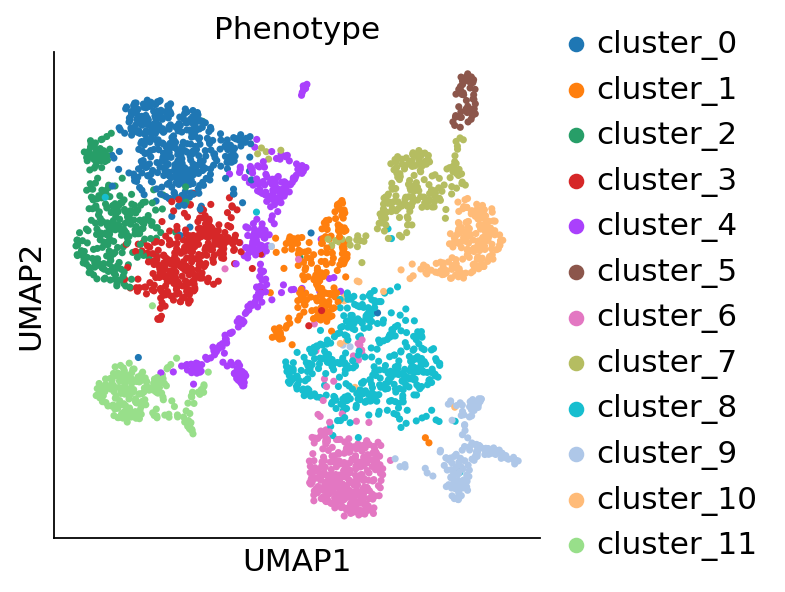

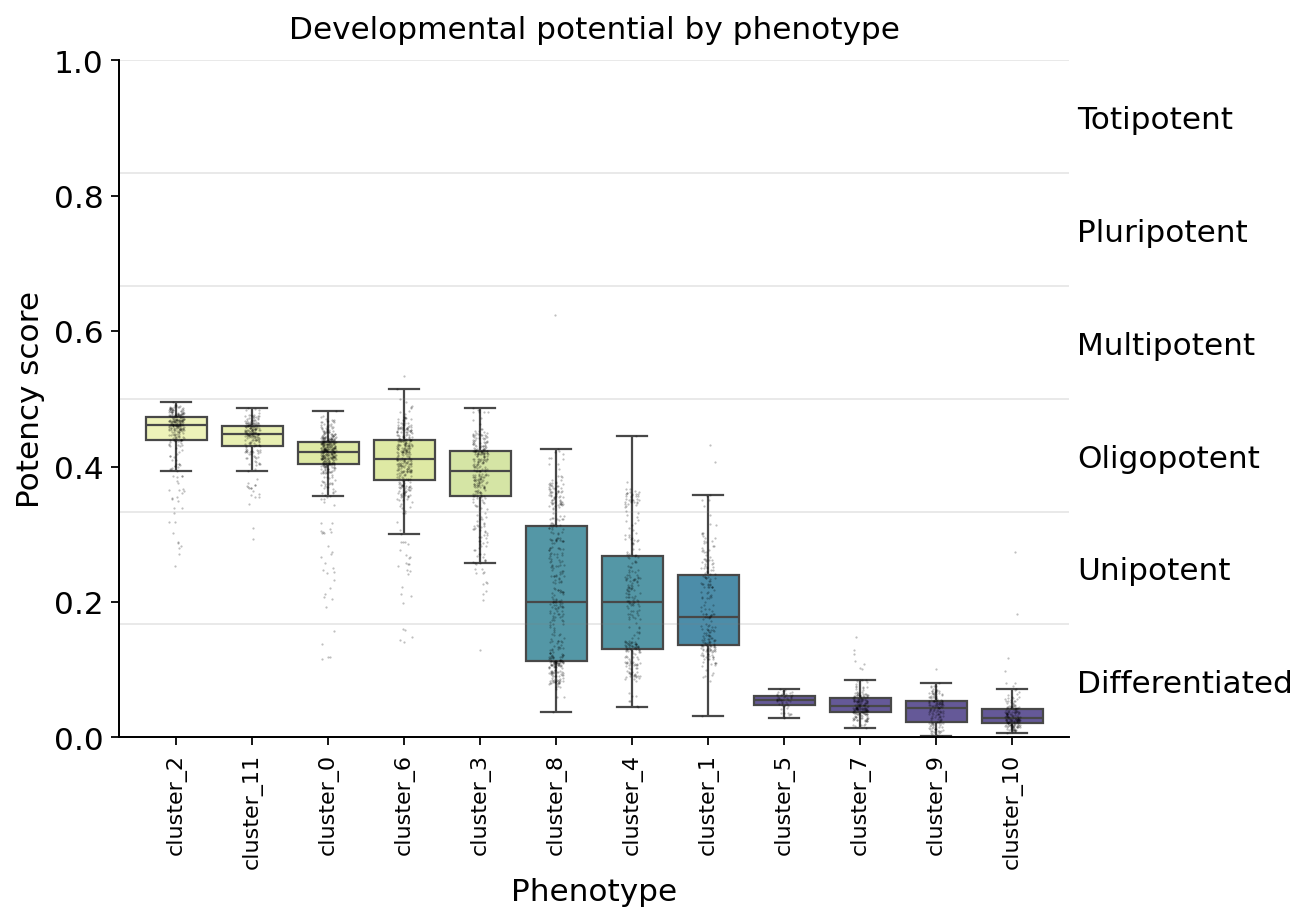

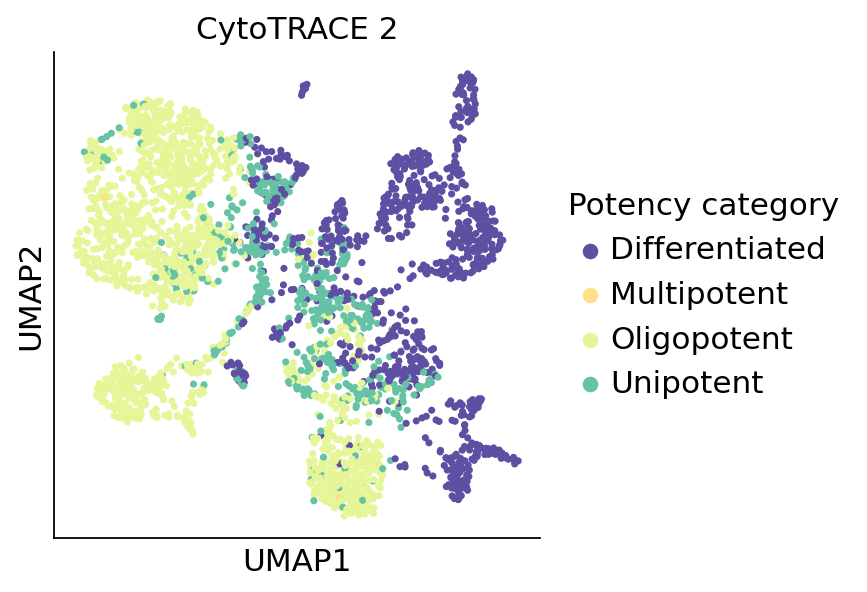

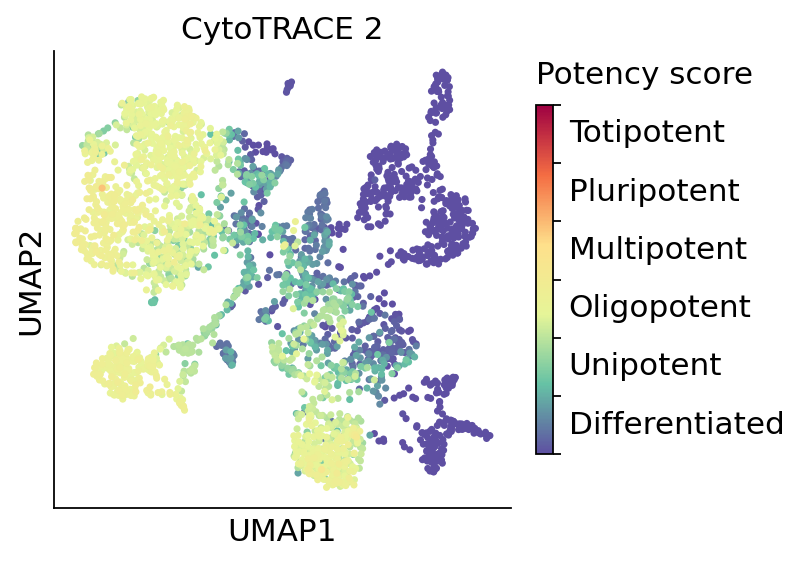

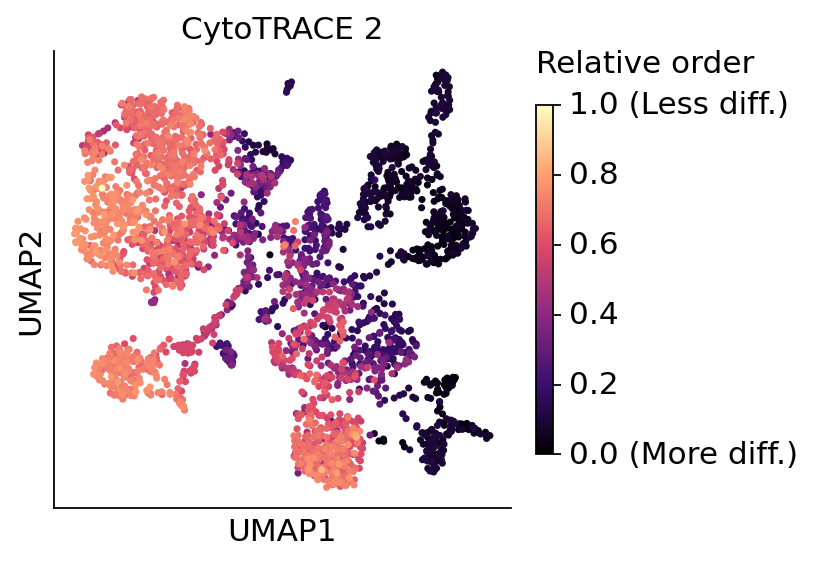

In [ ]:
adata_count.obs['leiden_res_ori_0.50'] = (
    "cluster_" + adata_count.obs['leiden_res_ori_0.50'].astype(str)
)

cell_annotations = adata_count.obs[['leiden_res_ori_0.50']].copy()

cell_annotations = cell_annotations.reset_index()
cell_annotations.columns = ['Cell_ID', 'Cell_Type']

cell_annotations.to_csv("cell_annotation.txt", sep='\t', header=True, index=False)
from cytotrace2_py.cytotrace2_py import *

input_path = "scRNA_seq_gene_expression.txt"
example_annotation_path = "cell_annotation.txt"
example_species = "human"
results =  cytotrace2(input_path,
                     annotation_path=example_annotation_path,
                     species=example_species)

In [ ]:
adata_count

AnnData object with n_obs × n_vars = 2927 × 2958
    obs: 'orig.ident', 'celltype', 'class', 'ident', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden_res_ori_1.00', 'major2', 'Samples', 'Sample_type', 'patient.id', 'smoke', 'Major_Type', 'STC2_EXP', 'umap_density_STC2_EXP', 'leiden_res_ori_0.50', 'leiden_res_ori_1.20', 'leiden_res_ori_0.30'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'Major_Type_colors', 'Sample_type_colors', 'Samples_colors', 'X_name', 'dendrogram_leiden_res_ori_1.00', 'dendrogram_major2', 'hvg', 'leiden_res_ori_1.00', 'log1p', 'neighbors', 'patient.id_colors', 'pca', 'rank_genes_groups', 'smoke_colors', 'umap', 'umap_density_STC2_EXP_params', 'leiden_res_ori_0.50', 'leiden_res_ori_1.20', 'leiden_res_ori_0.30', 'leiden_res_

#### CNV

In [ ]:
!pip install infercnvpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.7/411.7 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.3/491.3 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 5.0 MB/s eta 0:00:00


In [ ]:
import infercnvpy as cnv

In [ ]:
cancer_related_adata = adata_count
print(cancer_related_adata)

AnnData object with n_obs × n_vars = 2927 × 27705
    obs: 'orig.ident', 'celltype', 'class', 'ident', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden_res_ori_1.00', 'major2', 'Samples', 'Sample_type', 'patient.id', 'smoke', 'Major_Type', 'STC2_EXP', 'umap_density_STC2_EXP', 'leiden_res_ori_0.50', 'leiden_res_ori_1.20', 'leiden_res_ori_0.30', 'Program_1', 'Program_2', 'Program_3', 'Program_4', 'Program_5', 'Program_6', 'Program_7', 'Program_8', 'Program_9', 'Program_10', 'Program_11', 'cnv_score', 'CytoTRACE2_Score', 'CytoTRACE2_Potency', 'CytoTRACE2_Relative', 'preKNN_CytoTRACE2_Score', 'preKNN_CytoTRACE2_Potency', 'leiden_res_har_2.50', 'leiden_res_har_1.00', 'subtype'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'features_renamed', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'gene_id', 'chromosome', 'start', 'end'
    uns: 'Major_Type_colors', 

In [ ]:
cancer_related_adata

AnnData object with n_obs × n_vars = 2927 × 27705
    obs: 'orig.ident', 'celltype', 'class', 'ident', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden_res_ori_1.00', 'major2', 'Samples', 'Sample_type', 'patient.id', 'smoke', 'Major_Type', 'STC2_EXP', 'umap_density_STC2_EXP', 'leiden_res_ori_0.50', 'leiden_res_ori_1.20', 'leiden_res_ori_0.30', 'Program_1', 'Program_2', 'Program_3', 'Program_4', 'Program_5', 'Program_6', 'Program_7', 'Program_8', 'Program_9', 'Program_10', 'Program_11', 'cnv_score', 'CytoTRACE2_Score', 'CytoTRACE2_Potency', 'CytoTRACE2_Relative', 'preKNN_CytoTRACE2_Score', 'preKNN_CytoTRACE2_Potency', 'leiden_res_har_2.50', 'leiden_res_har_1.00', 'subtype'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'features_renamed', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'gene_id', 'chromosome', 'start', 'end'
    uns: 'Major_Type_colors', 

In [ ]:
!wget https://data.broadinstitute.org/Trinity/CTAT/cnv/hg38_gencode_v27.txt
!head -n 5 hg38_gencode_v27.txt

--2025-04-13 14:15:46--  https://data.broadinstitute.org/Trinity/CTAT/cnv/hg38_gencode_v27.txt
Resolving data.broadinstitute.org (data.broadinstitute.org)... 69.173.68.137
Connecting to data.broadinstitute.org (data.broadinstitute.org)|69.173.68.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1848802 (1.8M) [text/plain]
Saving to: ‘hg38_gencode_v27.txt.1’

hg38_gencode_v27.tx 100%[===================>]   1.76M  9.24MB/s    in 0.2s    

2025-04-13 14:15:46 (9.24 MB/s) - ‘hg38_gencode_v27.txt.1’ saved [1848802/1848802]

DDX11L1	chr1	11869	14409
WASH7P	chr1	14404	29570
MIR6859-1	chr1	17369	17436
MIR1302-2HG	chr1	29554	31109
MIR1302-2	chr1	30366	30503


In [ ]:
column_names = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
gtf_path = '/content/drive/MyDrive/Results/scRNAseq/gencode.v38.annotation.gtf'
gtf_sample = pd.read_csv(gtf_path, sep='\t', comment='#', names=column_names, nrows=5)
print(gtf_sample)

  seqname  source     feature  start    end score strand frame  \
0    chr1  HAVANA        gene  11869  14409     .      +     .   
1    chr1  HAVANA  transcript  11869  14409     .      +     .   
2    chr1  HAVANA        exon  11869  12227     .      +     .   
3    chr1  HAVANA        exon  12613  12721     .      +     .   
4    chr1  HAVANA        exon  13221  14409     .      +     .   

                                           attribute  
0  gene_id "ENSG00000223972.5"; gene_type "transc...  
1  gene_id "ENSG00000223972.5"; transcript_id "EN...  
2  gene_id "ENSG00000223972.5"; transcript_id "EN...  
3  gene_id "ENSG00000223972.5"; transcript_id "EN...  
4  gene_id "ENSG00000223972.5"; transcript_id "EN...  


In [ ]:
!pip install gtfparse

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 37.0 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 19.0.1
    Uninstalling pyarrow-19.0.1:
      Successfully uninstalled pyarrow-19.0.1


In [ ]:
gtf_file_path = '/content/drive/MyDrive/单细胞空转整合/Results/scRNAseq/gencode.v38.annotation.gtf'

cnv.io.genomic_position_from_gtf(gtf_file=gtf_file_path, adata=cancer_related_adata, gtf_gene_id='gene_name', inplace=True)
print(cancer_related_adata.var.head())

In [ ]:
cancer_related_adata.var_names

Index(['AL627309.1', 'AL627309.5', 'AP006222.2', 'AL732372.1', 'LINC01409',
       'FAM87B', 'LINC01128', 'LINC00115', 'FAM41C', 'AL645608.2',
       ...
       'AC092675.2', 'AC034195.1', 'IQCJ', 'AL050350.1', 'AC131902.1',
       'AL049870.2', 'AC066612.1', 'AC092378.1', 'C17orf112', 'PHEX-AS1'],
      dtype='object', name='gene_name', length=27705)

In [ ]:
import pandas as pd

gene_positions = pd.read_csv('hg38_gencode_v27.txt', sep='\t', header=None, names=['gene_name', 'chromosome', 'start', 'end'], on_bad_lines='skip')
print(gene_positions.head())

print(gene_positions['gene_name'].isin(cancer_related_adata.var_names).value_counts())

if 'chromosome' in cancer_related_adata.var.columns:
    cancer_related_adata.var.drop(columns=['chromosome', 'start', 'end'], inplace=True)

cancer_related_adata.var['gene_name'] = cancer_related_adata.var.index
cancer_related_adata.var.set_index('gene_name', inplace=True)

cancer_related_adata.var = cancer_related_adata.var.join(gene_positions.set_index('gene_name'), how='left')
print(cancer_related_adata.var.head())

     gene_name chromosome  start    end
0      DDX11L1       chr1  11869  14409
1       WASH7P       chr1  14404  29570
2    MIR6859-1       chr1  17369  17436
3  MIR1302-2HG       chr1  29554  31109
4    MIR1302-2       chr1  30366  30503
gene_name
False    31097
True     25511
Name: count, dtype: int64
            n_cells     mt  n_cells_by_counts  mean_counts  \
gene_name                                                    
AL627309.1       60  False                 60     0.001317   
AL627309.5      247  False                247     0.005619   
AP006222.2       38  False                 38     0.000966   
AL732372.1       16  False                 16     0.000439   
LINC01409       597  False                597     0.013564   

            pct_dropout_by_counts  total_counts features_renamed  \
gene_name                                                          
AL627309.1              99.868308          60.0       AL627309.1   
AL627309.5              99.457870         256.0       A

In [ ]:
cancer_related_adata.var.loc[:, ["chromosome", "start", "end"]].head()

chromosome     start       end
gene_name                                
AL627309.1       chr1   89295.0  133723.0
AL627309.5       chr1  141474.0  173862.0
AP006222.2        NaN       NaN       NaN
AL732372.1       chr1  358857.0  366052.0
LINC01409         NaN       NaN       NaN

In [ ]:
cancer_related_adata

AnnData object with n_obs × n_vars = 2927 × 27705
    obs: 'orig.ident', 'celltype', 'class', 'ident', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden_res_ori_1.00', 'major2', 'Samples', 'Sample_type', 'patient.id', 'smoke', 'Major_Type', 'STC2_EXP', 'umap_density_STC2_EXP', 'leiden_res_ori_0.50', 'leiden_res_ori_1.20', 'leiden_res_ori_0.30', 'Program_1', 'Program_2', 'Program_3', 'Program_4', 'Program_5', 'Program_6', 'Program_7', 'Program_8', 'Program_9', 'Program_10', 'Program_11', 'cnv_score', 'CytoTRACE2_Score', 'CytoTRACE2_Potency', 'CytoTRACE2_Relative', 'preKNN_CytoTRACE2_Score', 'preKNN_CytoTRACE2_Potency', 'leiden_res_har_2.50', 'leiden_res_har_1.00', 'subtype'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'features_renamed', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'gene_id', 'chromosome', 'start', 'end'
    uns: 'Major_Type_colors', 

In [ ]:
import anndata as ad

valid_genes = cancer_related_adata.var['chromosome'].notna()
filtered_adata = cancer_related_adata[:, valid_genes].copy()
print(filtered_adata)
print(filtered_adata.var.loc[:, ["chromosome", "start", "end"]].head())

AnnData object with n_obs × n_vars = 2927 × 25511
    obs: 'orig.ident', 'celltype', 'class', 'ident', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden_res_ori_1.00', 'major2', 'Samples', 'Sample_type', 'patient.id', 'smoke', 'Major_Type', 'STC2_EXP', 'umap_density_STC2_EXP', 'leiden_res_ori_0.50', 'leiden_res_ori_1.20', 'leiden_res_ori_0.30', 'Program_1', 'Program_2', 'Program_3', 'Program_4', 'Program_5', 'Program_6', 'Program_7', 'Program_8', 'Program_9', 'Program_10', 'Program_11', 'cnv_score', 'CytoTRACE2_Score', 'CytoTRACE2_Potency', 'CytoTRACE2_Relative', 'preKNN_CytoTRACE2_Score', 'preKNN_CytoTRACE2_Potency', 'leiden_res_har_2.50', 'leiden_res_har_1.00', 'subtype'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'features_renamed', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'gene_id', 'chromosome', 'start', 'end'
    uns: 'Major_Type_colors', 

In [ ]:
filtered_adata

AnnData object with n_obs × n_vars = 2927 × 25511
    obs: 'orig.ident', 'celltype', 'class', 'ident', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden_res_ori_1.00', 'major2', 'Samples', 'Sample_type', 'patient.id', 'smoke', 'Major_Type', 'STC2_EXP', 'umap_density_STC2_EXP', 'leiden_res_ori_0.50', 'leiden_res_ori_1.20', 'leiden_res_ori_0.30', 'Program_1', 'Program_2', 'Program_3', 'Program_4', 'Program_5', 'Program_6', 'Program_7', 'Program_8', 'Program_9', 'Program_10', 'Program_11', 'cnv_score', 'CytoTRACE2_Score', 'CytoTRACE2_Potency', 'CytoTRACE2_Relative', 'preKNN_CytoTRACE2_Score', 'preKNN_CytoTRACE2_Potency', 'leiden_res_har_2.50', 'leiden_res_har_1.00', 'subtype'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'features_renamed', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'gene_id', 'chromosome', 'start', 'end'
    uns: 'Major_Type_colors', 

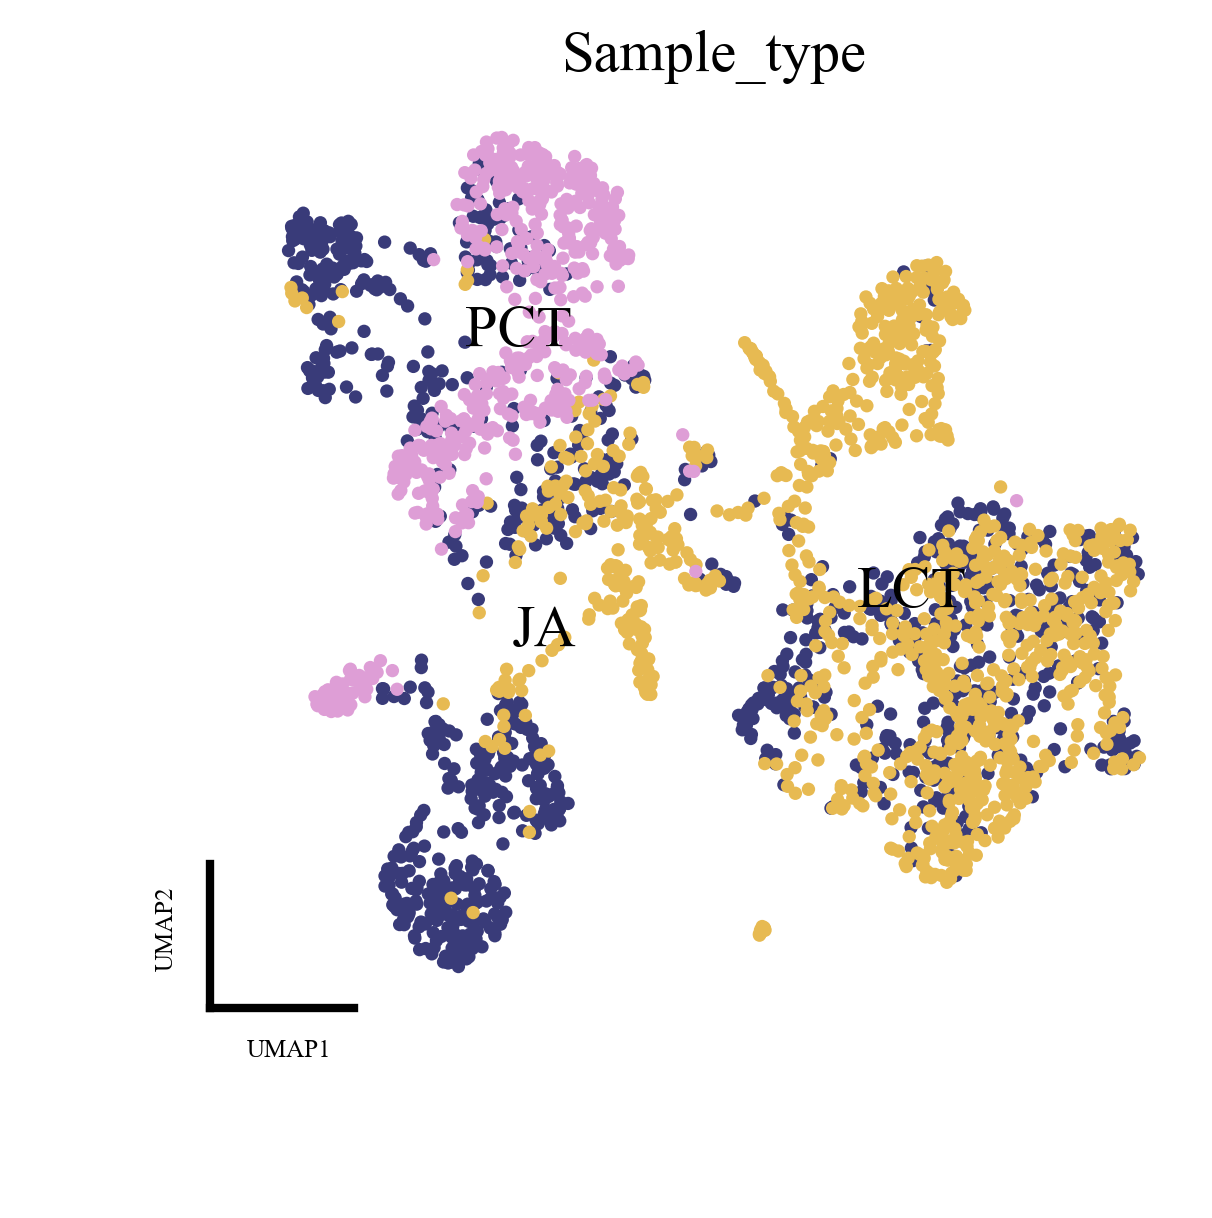

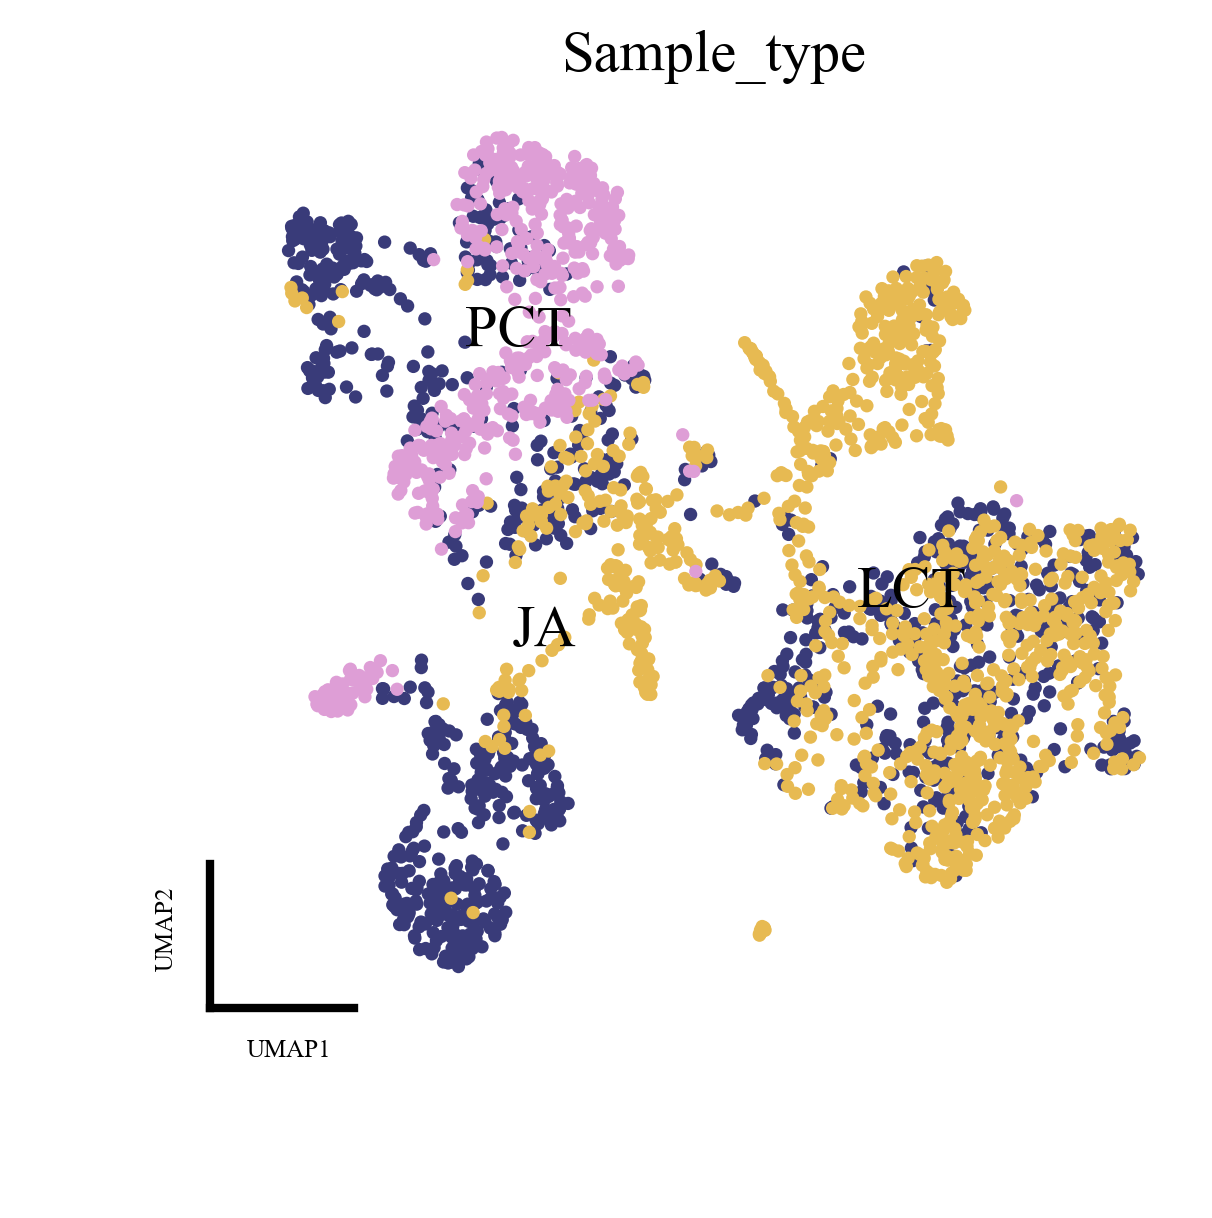

In [ ]:
ScPyPy.adv_umap(filtered_adata, color="Sample_type", palette='tab20b', save=None,legend_loc='on data')

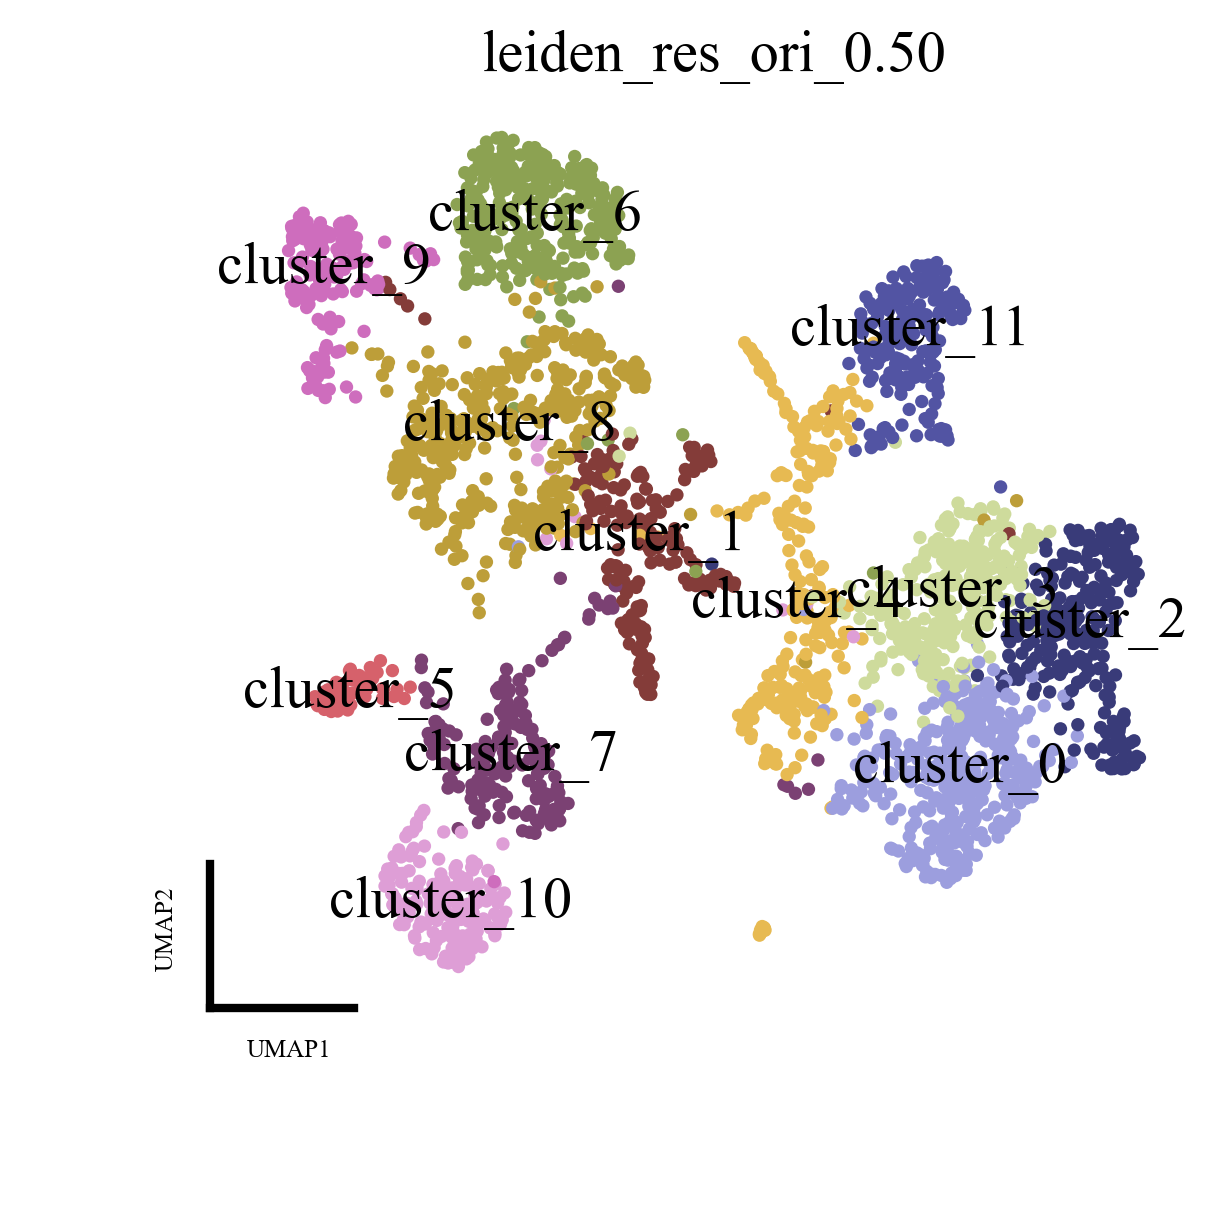

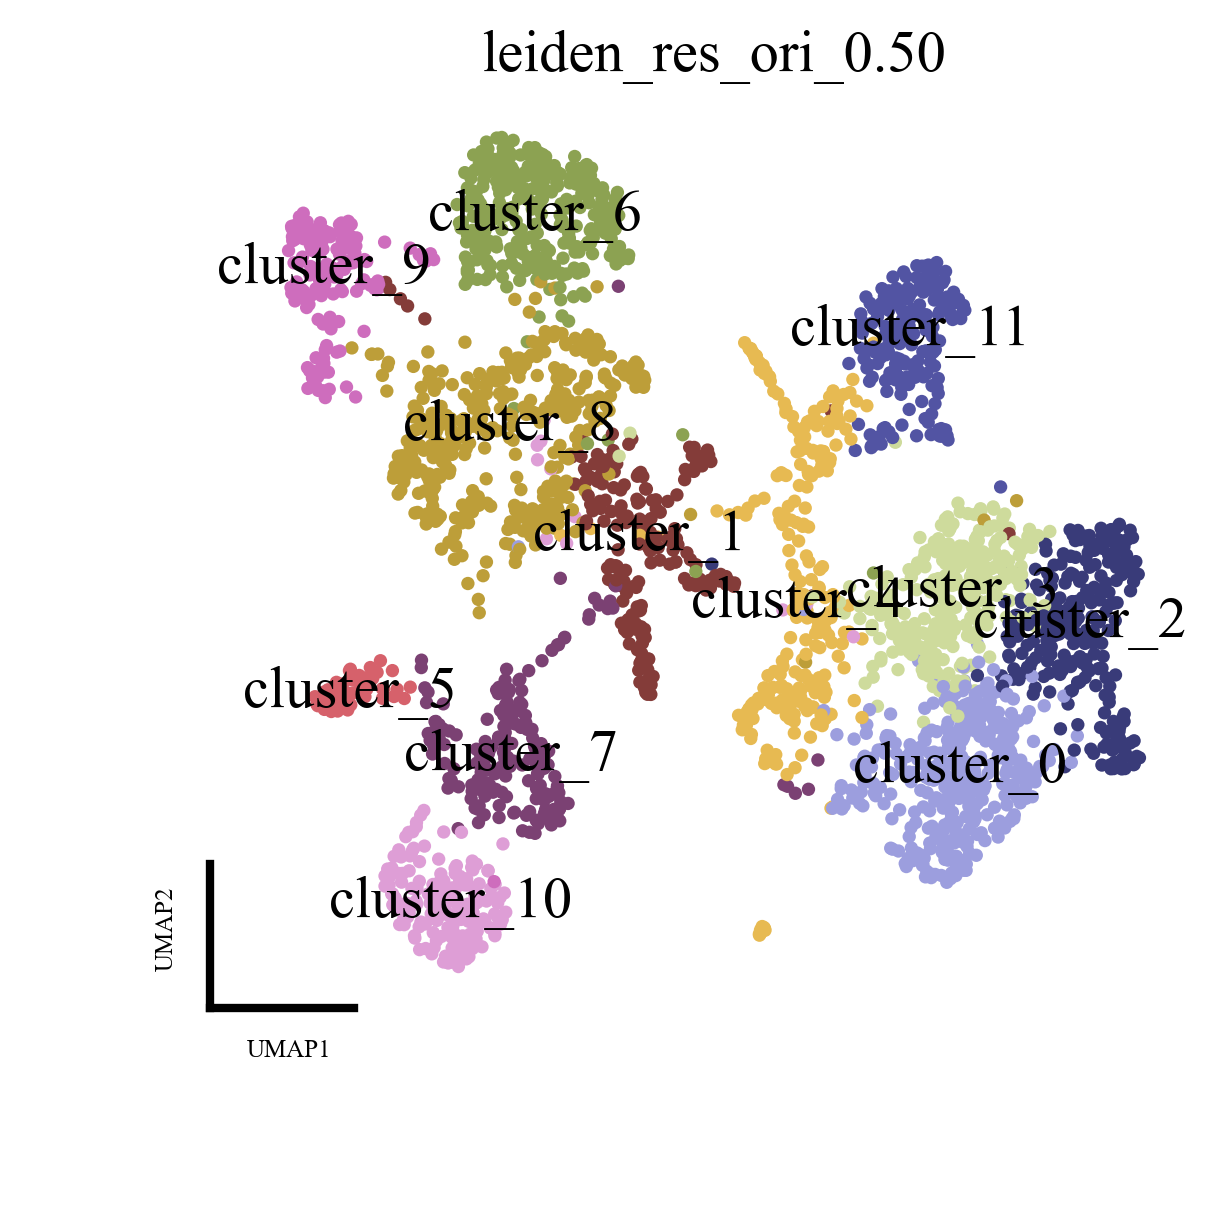

In [ ]:
ScPyPy.adv_umap(filtered_adata, color="leiden_res_ori_0.50", palette='tab20b', save=None,legend_loc='on data')

In [ ]:
import infercnvpy as cnv

In [ ]:
cnv.tl.infercnv(
    filtered_adata,
    reference_key="Sample_type",
    reference_cat=["PCT"],
    window_size=100,
)

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
filtered_adata

AnnData object with n_obs × n_vars = 2927 × 25511
    obs: 'orig.ident', 'celltype', 'class', 'ident', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden_res_ori_1.00', 'major2', 'Samples', 'Sample_type', 'patient.id', 'smoke', 'Major_Type', 'STC2_EXP', 'umap_density_STC2_EXP', 'leiden_res_ori_0.50', 'leiden_res_ori_1.20', 'leiden_res_ori_0.30', 'Program_1', 'Program_2', 'Program_3', 'Program_4', 'Program_5', 'Program_6', 'Program_7', 'Program_8', 'Program_9', 'Program_10', 'Program_11', 'cnv_score', 'CytoTRACE2_Score', 'CytoTRACE2_Potency', 'CytoTRACE2_Relative', 'preKNN_CytoTRACE2_Score', 'preKNN_CytoTRACE2_Potency', 'leiden_res_har_2.50', 'leiden_res_har_1.00', 'subtype'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'features_renamed', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'gene_id', 'chromosome', 'start', 'end'
    uns: 'Major_Type_colors', 

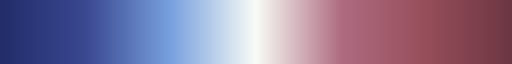

In [ ]:
custom_cnv

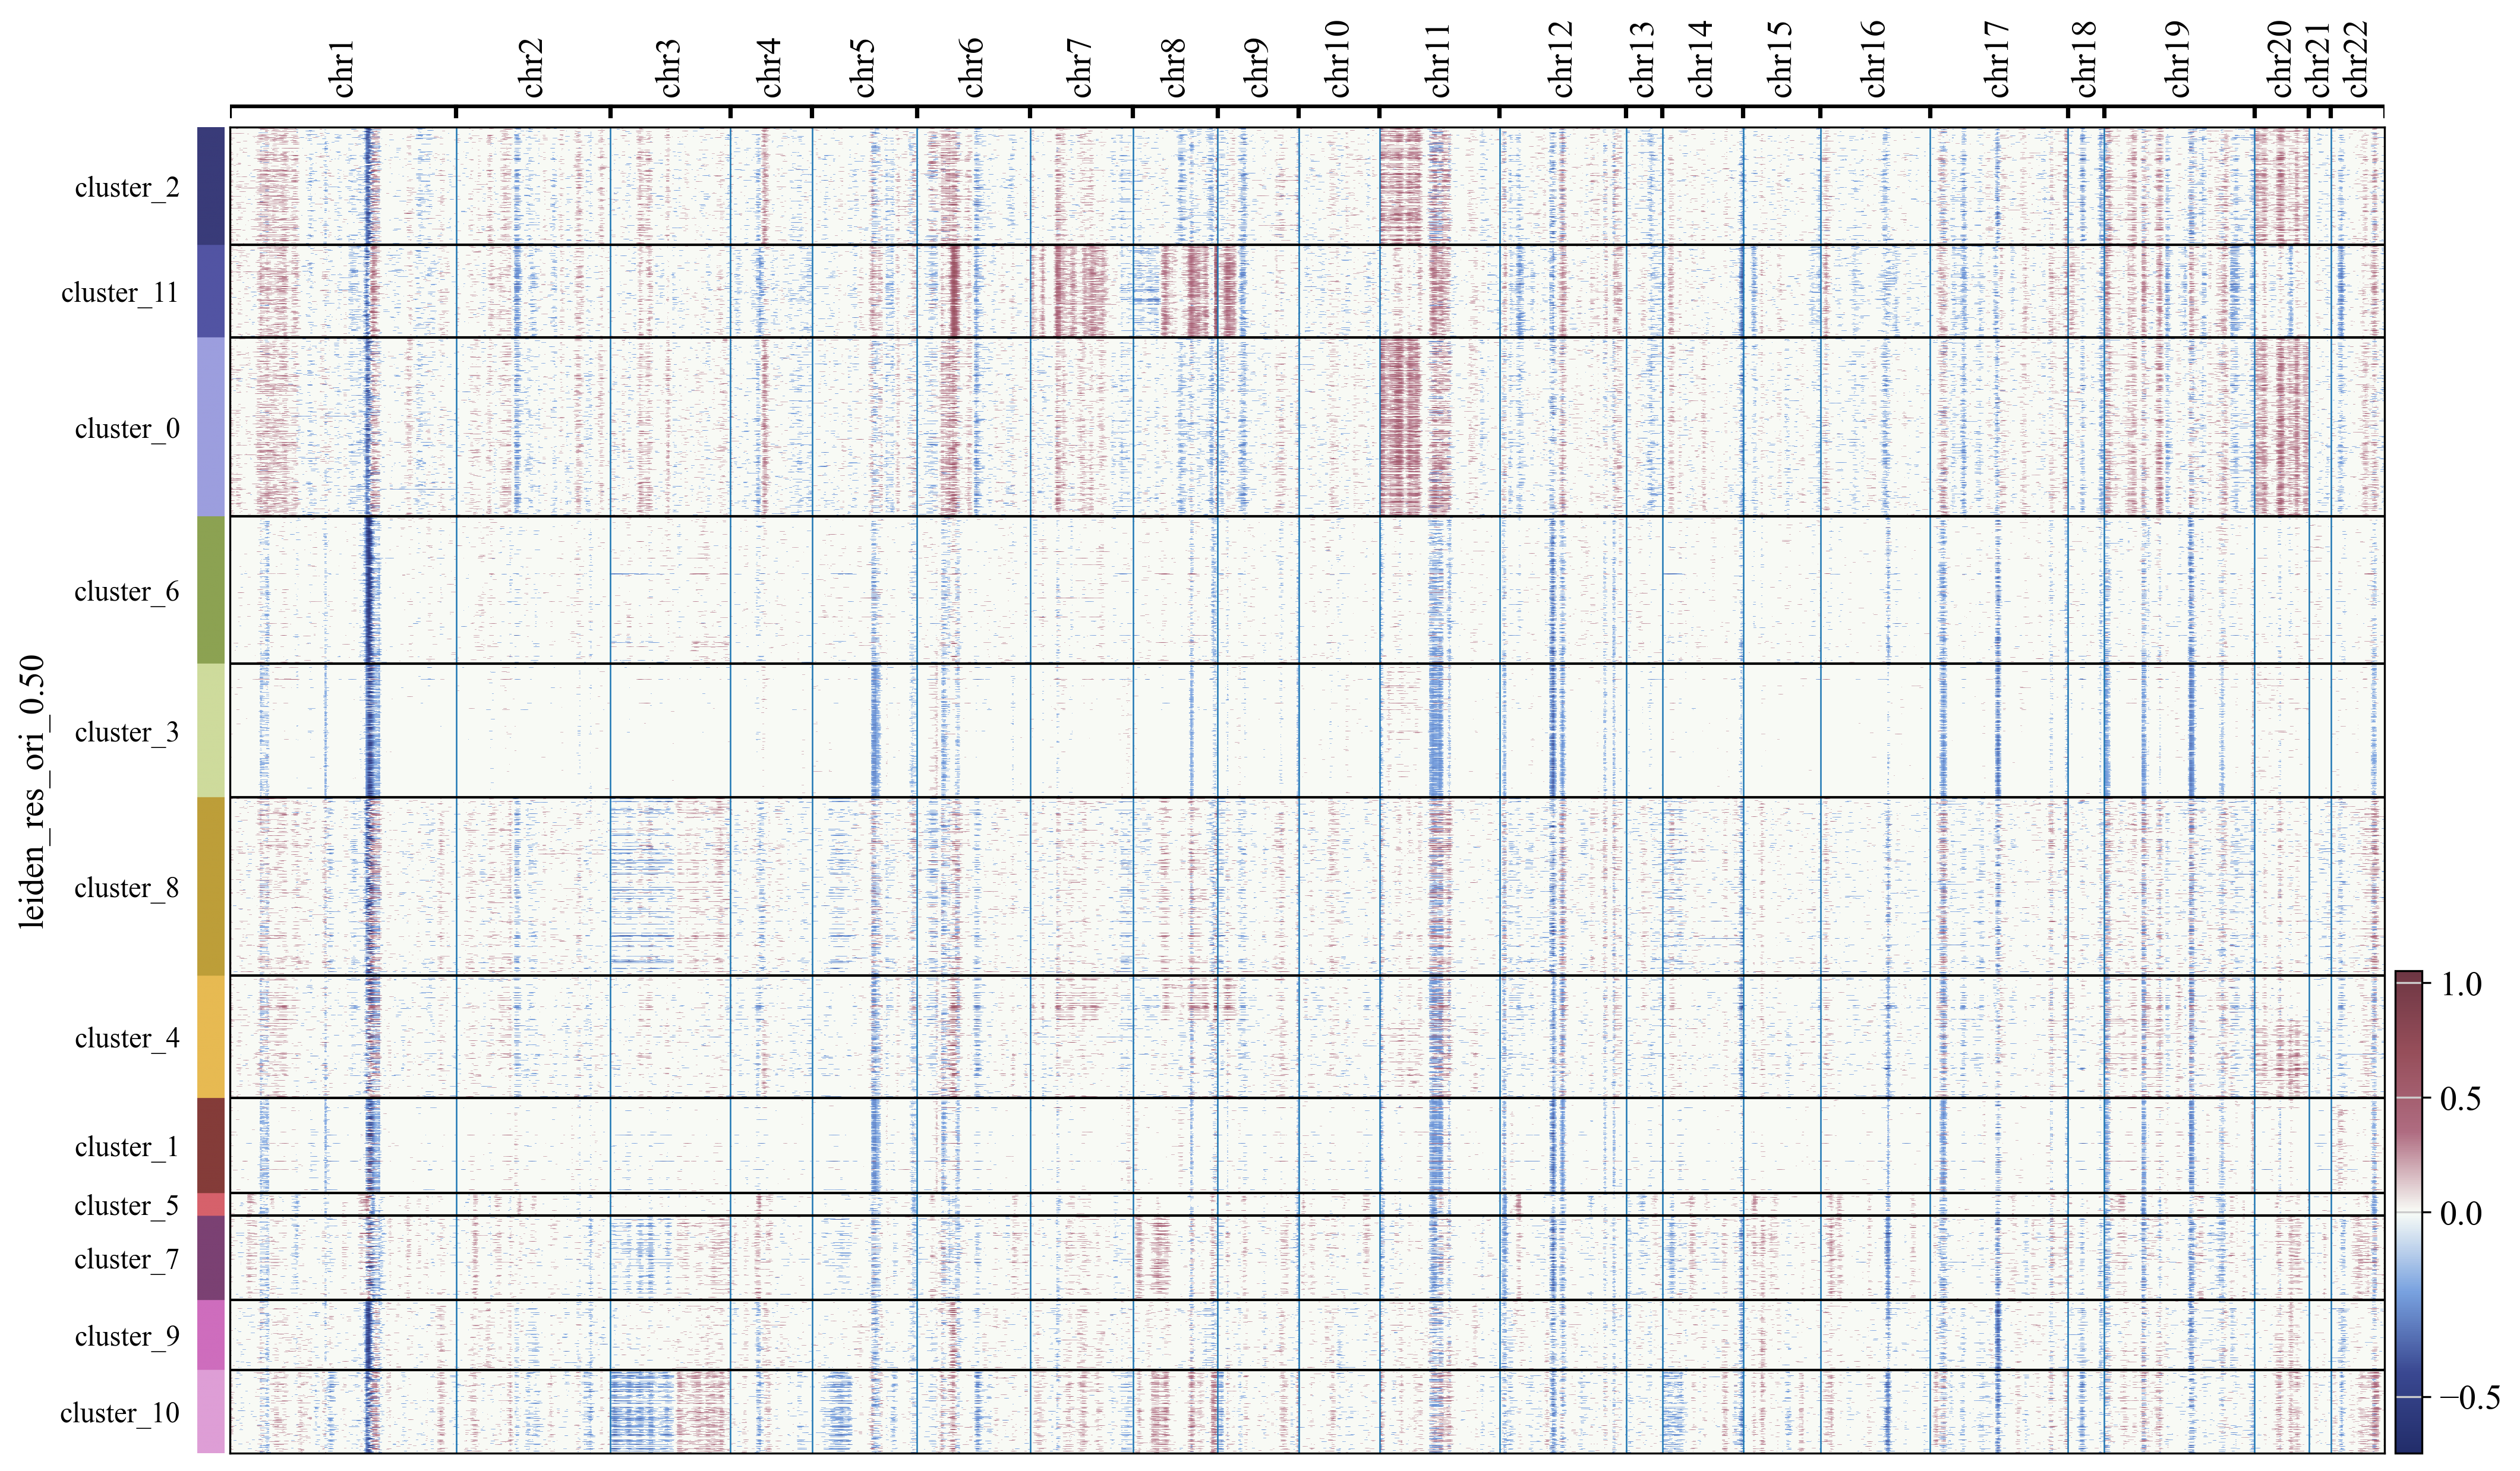

In [ ]:
cnv.pl.chromosome_heatmap(filtered_adata, cmap=custom_cnv,groupby="leiden_res_ori_0.50")

/usr/local/lib/python3.11/dist-packages/anndata/_core/storage.py:39: ImplicitModificationWarning: X should not be a np.matrix, use np.ndarray instead.


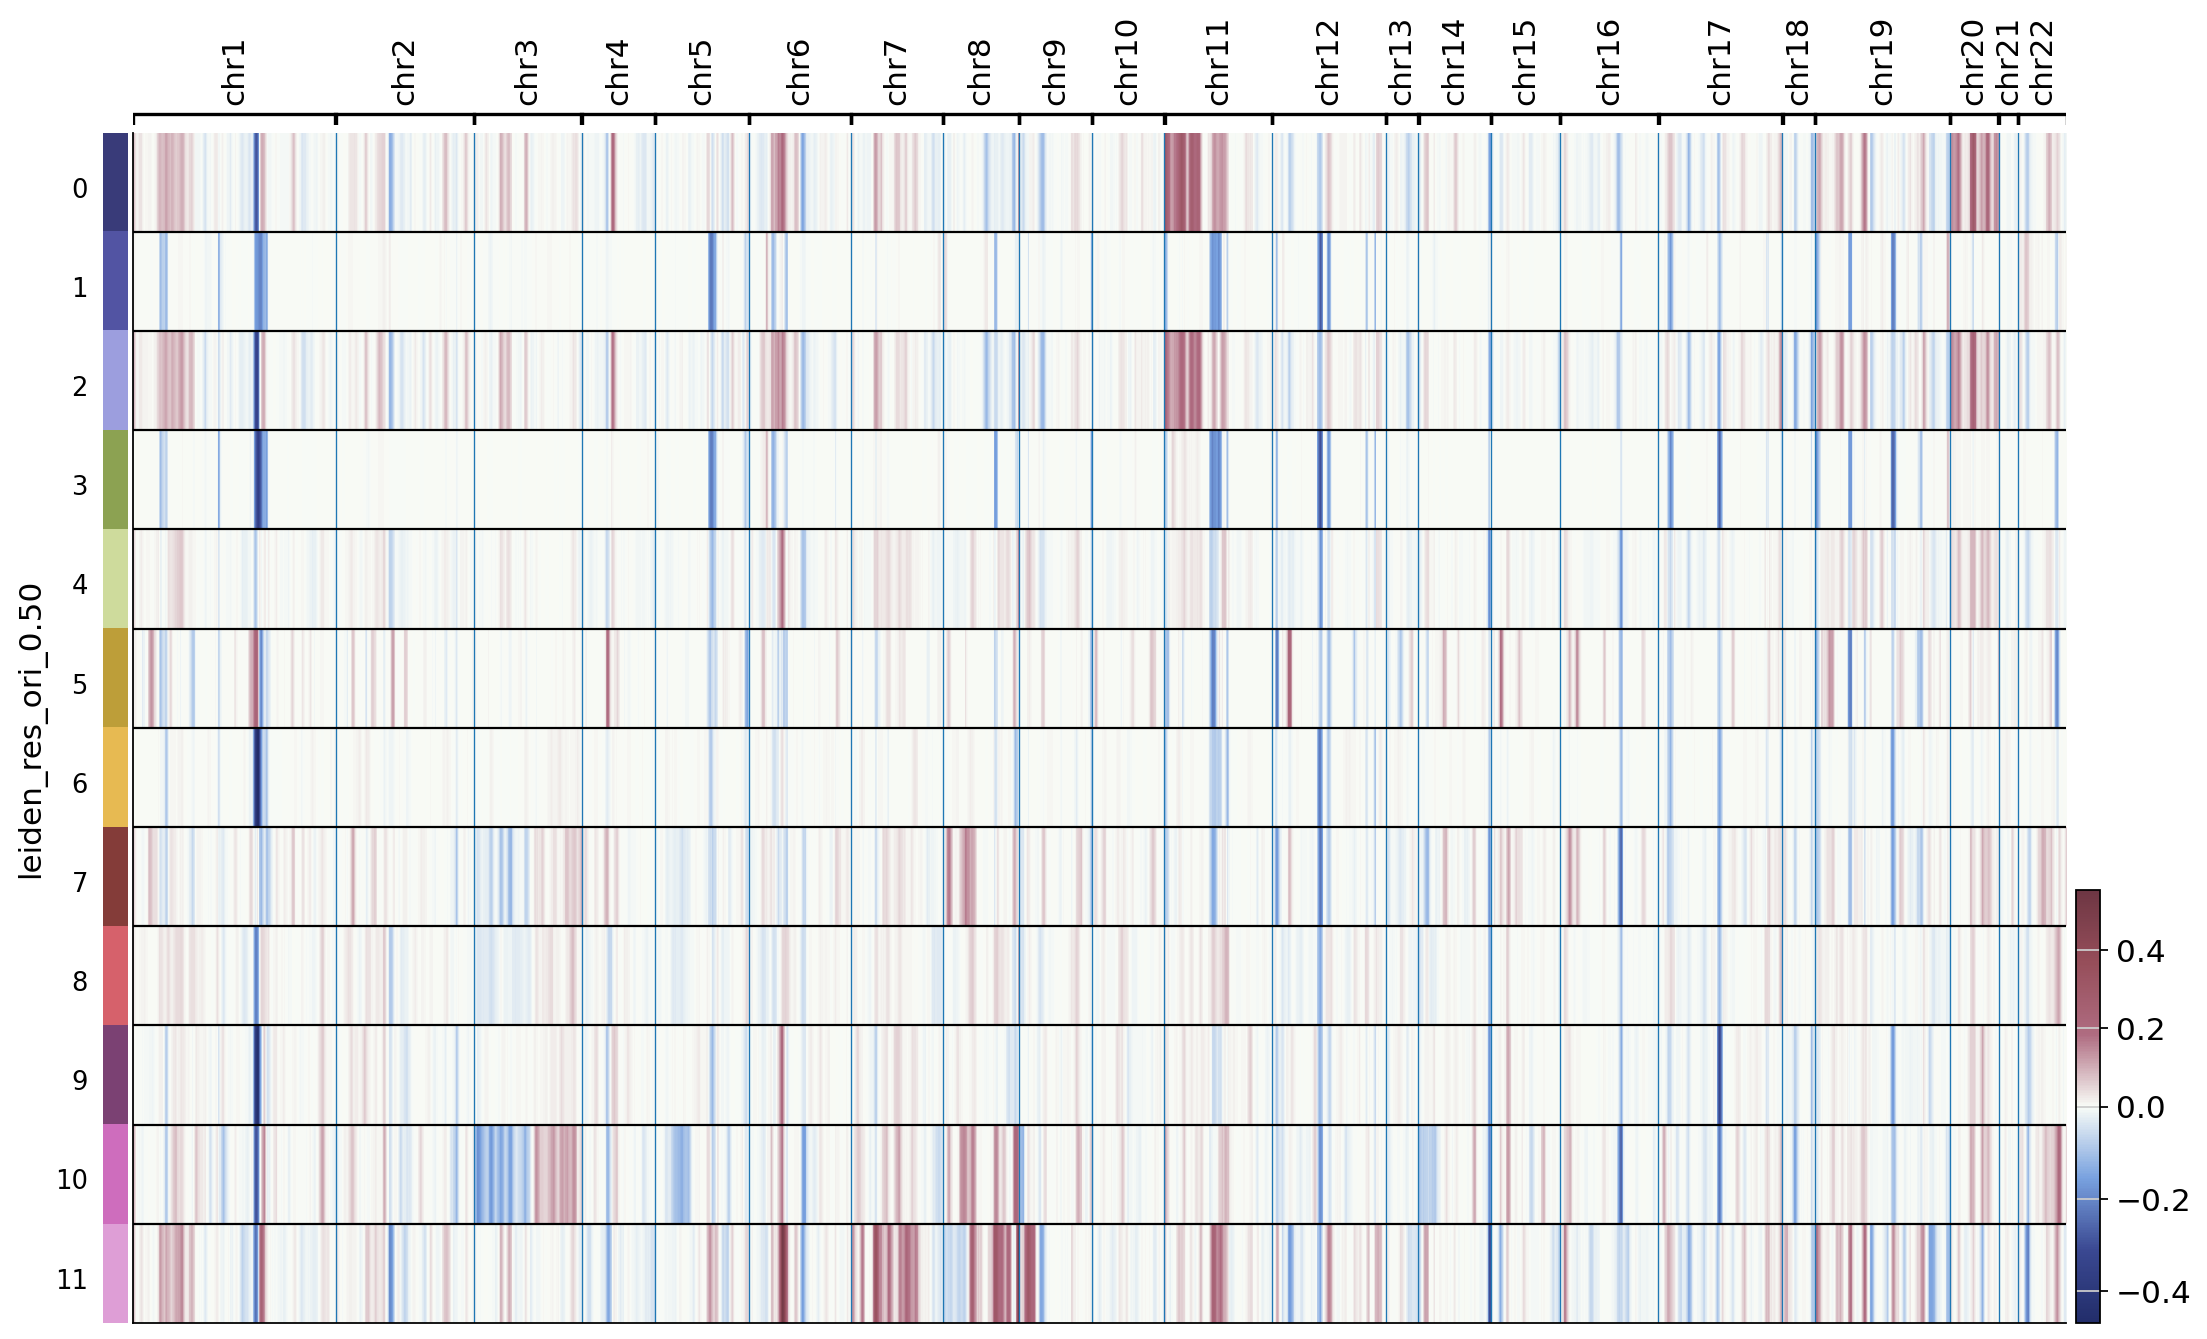

In [ ]:
cnv.pl.chromosome_heatmap_summary(filtered_adata, cmap=custom_cnv,groupby="leiden_res_ori_0.50")

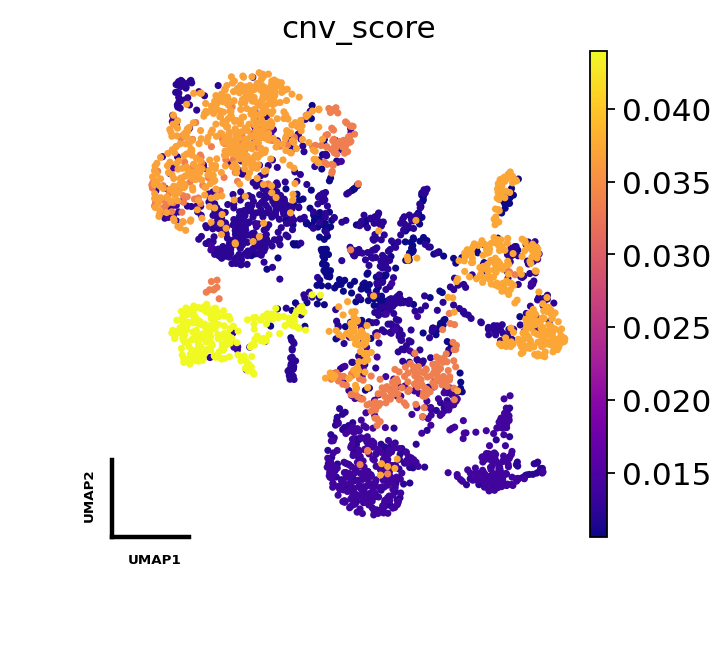

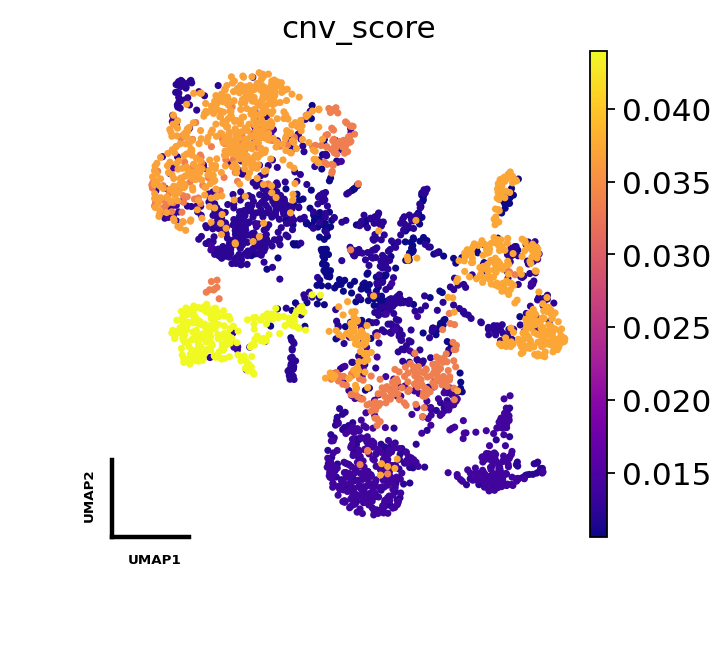

In [ ]:
ScPyPy.adv_umap(filtered_adata, color="cnv_score", palette=custom_cnv, save=None)

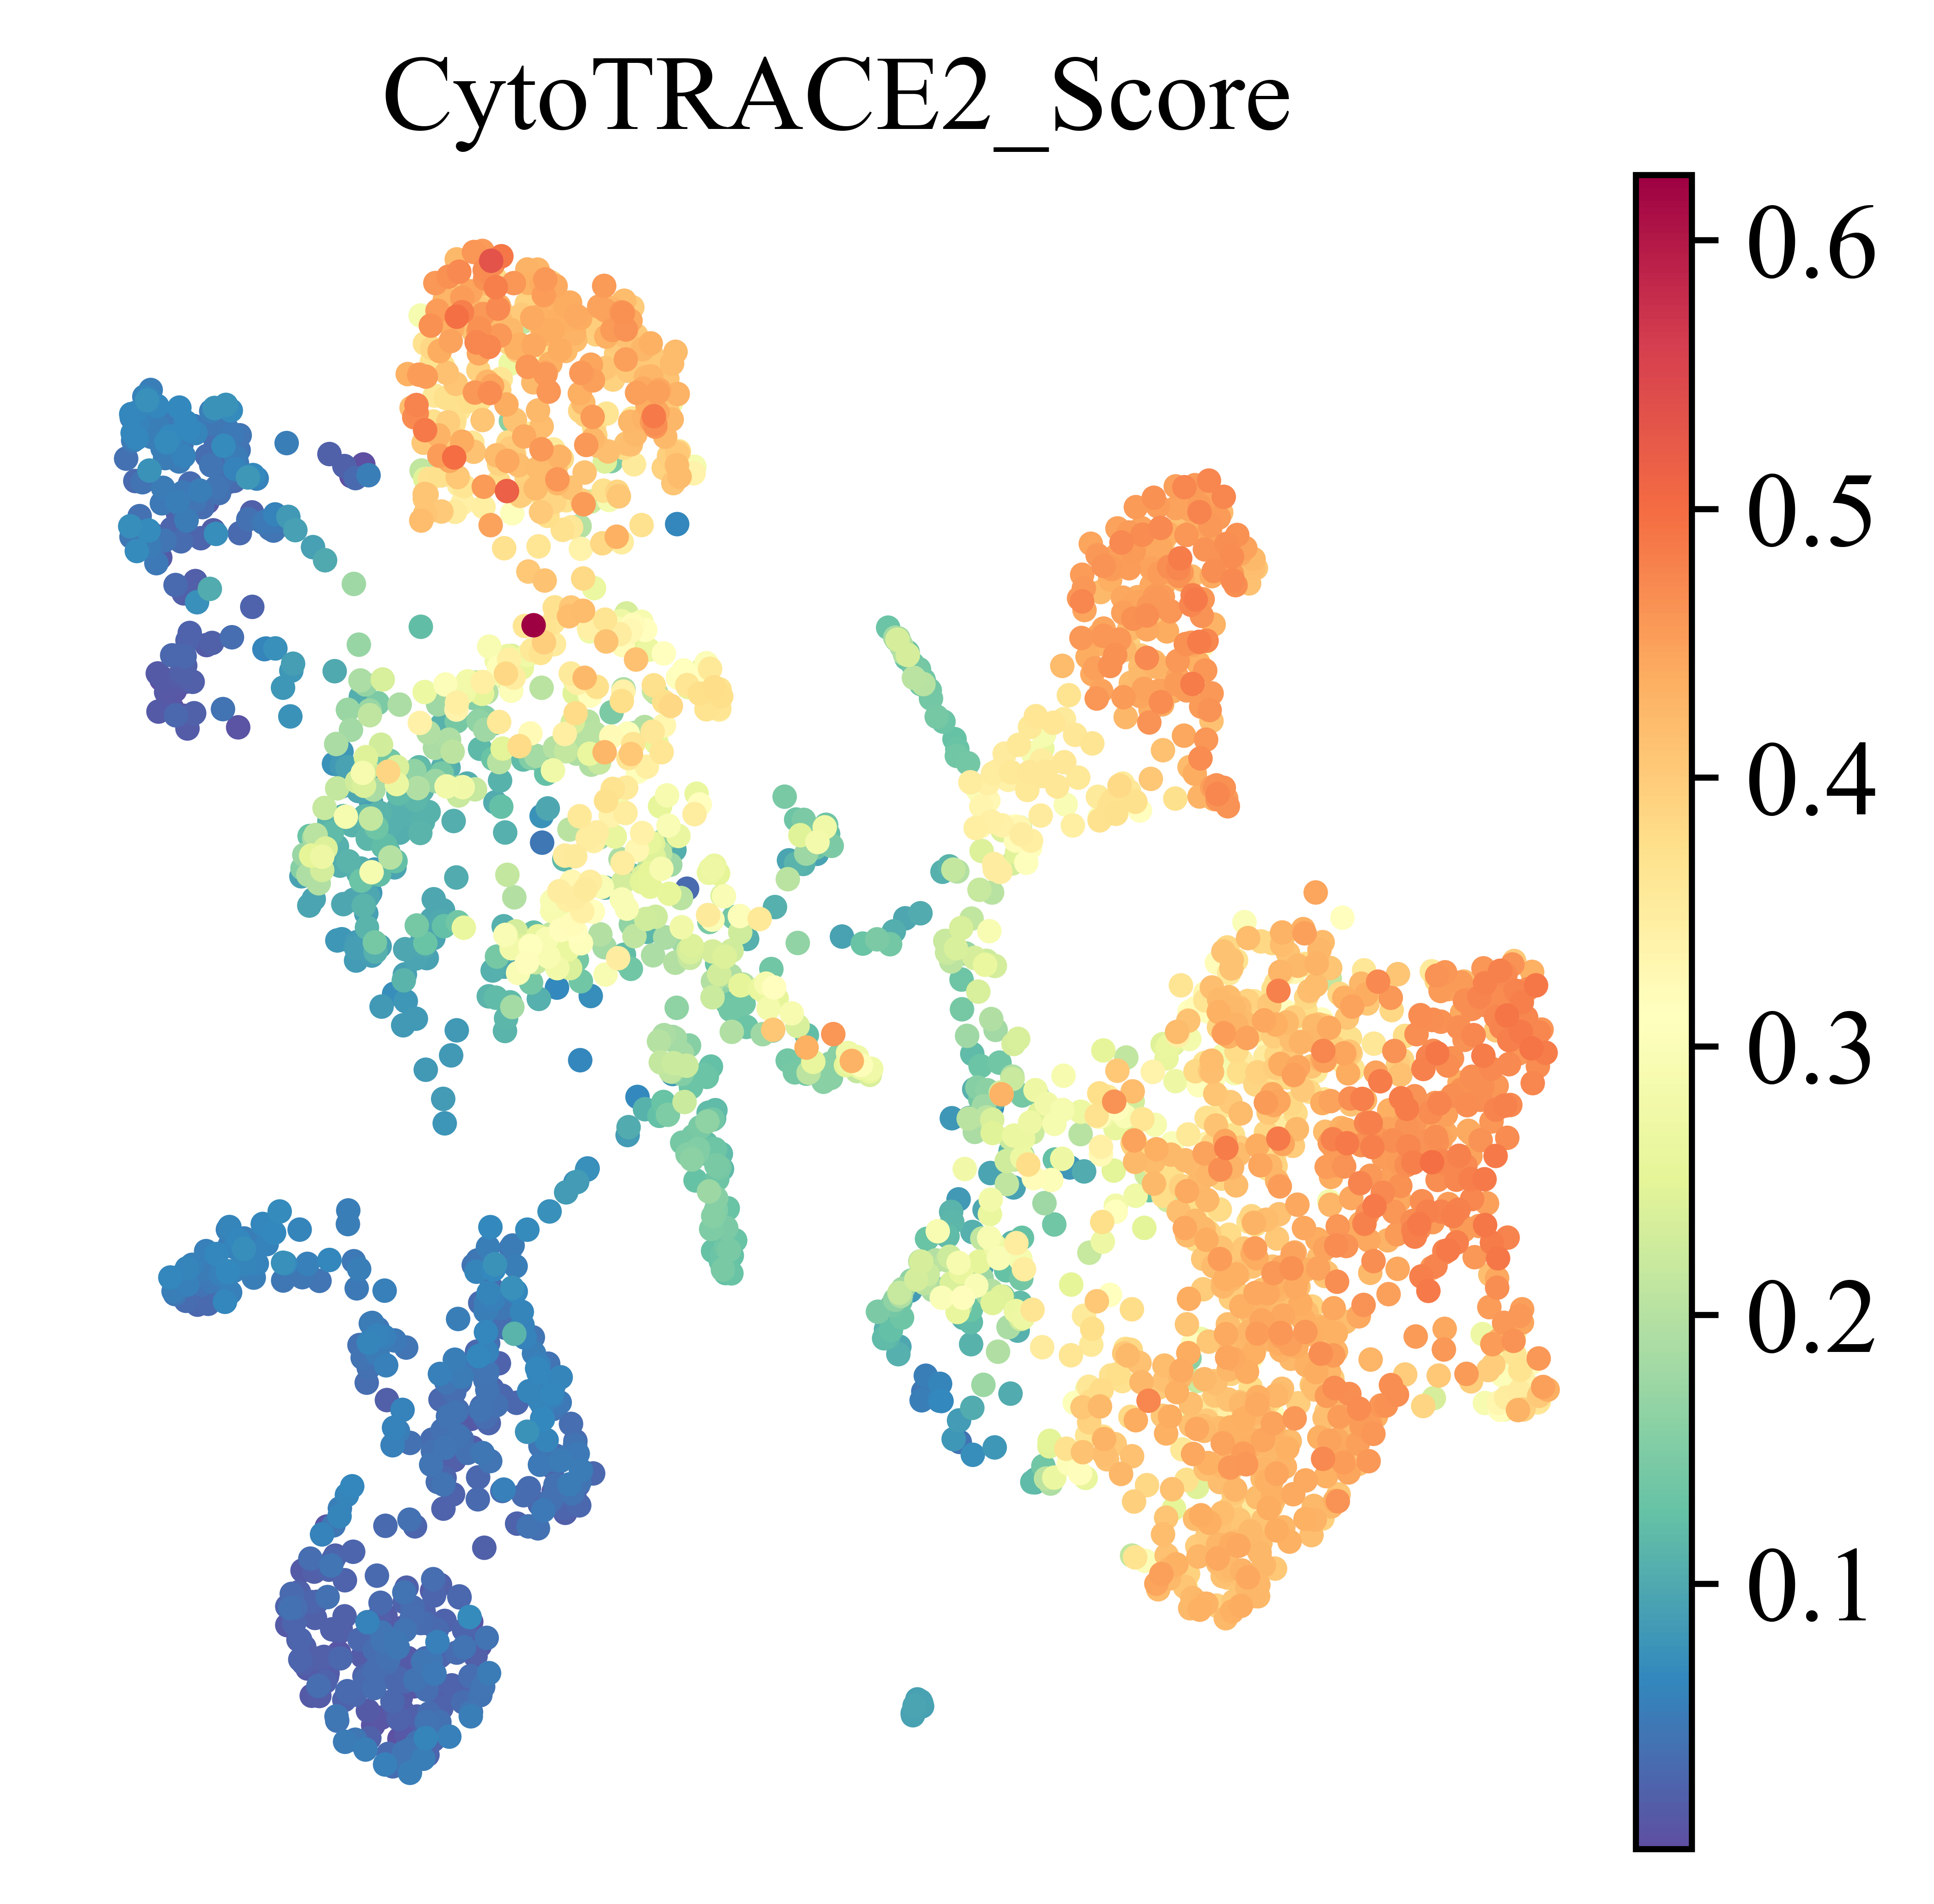

In [ ]:
sc.pl.umap(
    t_nk_cells_adata_count,
    color=["CytoTRACE2_Score"],
    frameon=False,
    #legend_loc="on data",
)

#function

In [ ]:
class ScPyPy:
    @staticmethod
    def adv_umap(adata, color=None, mask_obs=None, gene_symbols=None, use_raw=None, sort_order=True, edges=False,
        edges_width=0.1, edges_color='grey', neighbors_key=None, arrows=False, arrows_kwds=None, groups=None,
        components=None, dimensions=None, layer=None, projection='2d', scale_factor=None, color_map="plasma",
        cmap=None, palette='tab20b', na_color='lightgray', na_in_legend=True, size=None, frameon=False,
        legend_fontsize=None, legend_fontweight='bold', legend_loc='right margin', legend_fontoutline=None,
        colorbar_loc='right', vmax=None, vmin=None, vcenter=None, norm=None, add_outline=False,
        outline_width=(0.3, 0.05), outline_color=('black', 'white'), ncols=4, hspace=0.25, wspace=None, title=None,
        show=False, save=None, ax=None, return_fig=None, marker='.',min_ax_fontsize = 6,min_ax_lw = 2, **kwargs):
        """
        Visualize UMAP projections of the data with the option to save the output.

        Example:
        adv_umap(adata, color_feature, palette='tab20b', save=None, save_format='png')
        Parameters:
        adata (AnnData): Annotated data matrix.
        color_feature (str): Column name in adata.obs to use for coloring.
        palette (str, optional): Color palette name. Defaults to 'tab20b'.
        save (str, optional): If provided, save the figure to this file name within a 'figures' directory.
        save_format (str, optional): Format to save the figure in, e.g., 'png', 'pdf', etc. Defaults to 'png'.
        """
        fig, main_ax = plt.subplots()
        #sc.pl.umap(adata, color=[color_feature], frameon=False, ax=main_ax, show=False,color_map=color_map, palette=palette)
        sc.pl.umap(
        adata=adata,
        ax=main_ax,
        color=color,
        mask_obs=mask_obs,
        gene_symbols=gene_symbols,
        use_raw=use_raw,
        sort_order=sort_order,
        edges=edges,
        edges_width=edges_width,
        edges_color=edges_color,
        neighbors_key=neighbors_key,
        arrows=arrows,
        arrows_kwds=arrows_kwds,
        groups=groups,
        components=components,
        dimensions=dimensions,
        layer=layer,
        projection=projection,
        scale_factor=scale_factor,
        color_map=color_map,
        cmap=cmap,
        palette=palette,
        na_color=na_color,
        na_in_legend=na_in_legend,
        size=size,
        frameon=frameon,
        legend_fontsize=legend_fontsize,
        legend_fontweight=legend_fontweight,
        legend_loc=legend_loc,
        legend_fontoutline=legend_fontoutline,
        colorbar_loc=colorbar_loc,
        vmax=vmax,
        vmin=vmin,
        vcenter=vcenter,
        norm=norm,
        add_outline=add_outline,
        outline_width=outline_width,
        outline_color=outline_color,
        ncols=ncols,
        hspace=hspace,
        wspace=wspace,
        title=title,
        show=show,
        save=save,
        return_fig=return_fig,
        marker=marker,
        **kwargs
              )
        min_ax = fig.add_axes([0.0, 0.0, 0.6, 0.6])  # xmin, ymin, dx, dy
        min_ax.set_xlim(0, 2)
        min_ax.set_ylim(0, 2)
        min_ax.axis('off')
        min_ax.plot([0.5, 0.9], [0.5, 0.5], lw=min_ax_lw, color='k')
        min_ax.plot([0.5, 0.5], [0.5, 0.9], lw=min_ax_lw, color='k')
        min_ax.text(0.72, 0.38, 'UMAP1', horizontalalignment='center', verticalalignment='center', fontsize=min_ax_fontsize, fontweight='bold')
        min_ax.text(0.38, 0.72, 'UMAP2', horizontalalignment='center', verticalalignment='center', fontsize=min_ax_fontsize, rotation=90, fontweight='bold')

        if save:
            os.makedirs('figures', exist_ok=True)
            file_path = os.path.join('figures', f'{save}.{save_format}')
            plt.savefig(file_path, format=save_format, dpi=300)
            print(f"Saved figure as {file_path}")

        plt.show()
        #plt.close(fig)

        return fig
        plt.close(fig)
